## David Carpenter
## 16 January 2024
## Exercise 4.10

## Table of Contents

### Question 1 - Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

### Question 2 - Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

### Question 3 - The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

### Question 4 - The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

### Question 5 - The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### Question 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### Question 6 - Create an appropriate visualization to show the distribution of profiles.

### Question 8 - Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### ************************************************************************************************

### Question 1 - Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [160]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [161]:
# Create a path variable

path = r'/Users/davidcarpenter/Documents/Instacart Basket Analysis'

In [162]:
# Import the dataframe

df_1 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ex4-9-exercise-part-2.pkl')) 

In [163]:
# Set maximum number of visible columns to 50

pd.set_option('display.max_columns', 50)

In [164]:
# Set maximum number of visible rows to 150

pd.set_option('display.max_rows', 50)

### Question 2 - Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [165]:
# Delete the columns 'first_name' and 'last_name' and assign the results to a new dataframe

df_2 = df_1.drop(['first_name', 'last_name'], axis=1)

In [166]:
# df_1.dtypes

In [167]:
# df_2.dtypes

### Question 3 - The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [168]:
# Assign states to regions, use Wikipedia page 
# https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States as source

In [169]:
# Assign states to the 'Midwest' region

df_2.loc[(df_2['state'] == 'Minnesota') | 
         (df_2['state'] == 'Iowa') | 
         (df_2['state'] == 'Michigan') | 
         (df_2['state'] == 'Wisconsin') | 
         (df_2['state'] == 'Illinois') | 
         (df_2['state'] == 'Indiana')|
         (df_2['state'] == 'North Dakota')|
         (df_2['state'] == 'South Dakota')|
         (df_2['state'] == 'Nebraska')|
         (df_2['state'] == 'Kansas')|
         (df_2['state'] == 'Missouri')|
         (df_2['state'] == 'Ohio'), 
         'region'] = 'Midwest'

In [170]:
# Assign states to the 'Northeast' region

df_2.loc[(df_2['state'] == 'Maine') | 
         (df_2['state'] == 'New Hampshire') | 
         (df_2['state'] == 'Vermont') | 
         (df_2['state'] == 'Massachusetts') | 
         (df_2['state'] == 'Rhode Island') | 
         (df_2['state'] == 'Connecticut')|
         (df_2['state'] == 'New York')|
         (df_2['state'] == 'Pennsylvania')|
         (df_2['state'] == 'New Jersey'), 
         'region'] = 'Northeast'

In [171]:
# Assign states to the 'South' region

df_2.loc[(df_2['state'] == 'Delaware') | 
         (df_2['state'] == 'Maryland') | 
         (df_2['state'] == 'District of Columbia') | 
         (df_2['state'] == 'Virginia') | 
         (df_2['state'] == 'West Virginia') | 
         (df_2['state'] == 'North Carolina')|
         (df_2['state'] == 'South Carolina')|
         (df_2['state'] == 'Georgia')|
         (df_2['state'] == 'Kentucky')|
         (df_2['state'] == 'Tennessee')|
         (df_2['state'] == 'Mississippi')|
         (df_2['state'] == 'Alabama')|
         (df_2['state'] == 'Oklahoma')|
         (df_2['state'] == 'Texas')|
         (df_2['state'] == 'Arkansas')|
         (df_2['state'] == 'Louisiana')|
         (df_2['state'] == 'Florida'), 
         'region'] = 'South'

In [172]:
# Assign states to the 'West' region

df_2.loc[(df_2['state'] == 'Idaho') | 
         (df_2['state'] == 'Montana') | 
         (df_2['state'] == 'Wyoming') | 
         (df_2['state'] == 'Nevada') | 
         (df_2['state'] == 'Utah') | 
         (df_2['state'] == 'Colorado')|
         (df_2['state'] == 'Arizona')|
         (df_2['state'] == 'New Mexico')|
         (df_2['state'] == 'Alaska')|
         (df_2['state'] == 'Washington')|
         (df_2['state'] == 'Oregon')|
         (df_2['state'] == 'California')|
         (df_2['state'] == 'Hawaii'), 
         'region'] = 'West'

### Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [173]:
# Create pivot table that aggregates spending types based on region.

df_3 = df_2.pivot_table(index = 'region', columns = 'spend_type', aggfunc = 'size', fill_value = 0)

In [174]:
df_3

spend_type,High spender,Low spender
region,,
Midwest,156129,7447681
Northeast,108343,5620004
South,210182,10591428
West,160807,8139638


In [175]:
# Show the total amount spent by all customers for each region.

df_2.groupby('region')['prices'].sum()

region
Midwest      59277424.8
Northeast    44602964.8
South        84233999.6
West         64693170.8
Name: prices, dtype: float64

#### It appears that people in the 'south' region contain both more high and low spenders than the other three regions. Also, the total amount spent by people in the 'south' region is more than by people in the other three regions, too. People in the 'northeast' region make up the minority of both the high and low spender groups and spend less total on items compared to the other groups.

### Question 4 - The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [176]:
# df_2.loc[df_2['user_id'] == 138]

In [177]:
# Create new column named 'order_flag' and insert the text 'Fewer than 5' if the user has made fewer than 5 orders.
# If the user has made 5 or more orders, insert the text '5 or more'.

df_2['order_flag'] = np.where(df_2['max_order'] < 5, 'Fewer than 5', '5 or more')

In [178]:
df_2.tail()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,slowest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spend_type,order_frequency,order_type,gender,state,age,date_joined,dependants,marital_status,income,region,order_flag
32434207,49235,Organic Half & Half,53,16,1.8,2542346,80734,prior,3,3,8,22.0,1,1,both,Low-range product,-,Slowest day,Average orders,3,New customer,1.8,Low spender,22.0,Non frequent customer,Male,Alabama,45,9/28/2019,1,married,41072,South,Fewer than 5
32434208,49520,Orange Sparkling Water,115,7,7.5,1363278,74506,prior,1,1,14,NaN,1,0,both,Mid-range product,Busiest day,-,Most orders,4,New customer,7.5,Low spender,13.0,Regular customer,Male,Vermont,44,4/16/2018,3,married,97209,Northeast,Fewer than 5
32434209,49520,Orange Sparkling Water,115,7,7.5,2008002,74506,prior,2,0,15,30.0,1,1,both,Mid-range product,Busiest day,-,Most orders,4,New customer,7.5,Low spender,13.0,Regular customer,Male,Vermont,44,4/16/2018,3,married,97209,Northeast,Fewer than 5
32434210,49520,Orange Sparkling Water,115,7,7.5,1595973,74506,prior,3,1,17,8.0,1,1,both,Mid-range product,Busiest day,-,Average orders,4,New customer,7.5,Low spender,13.0,Regular customer,Male,Vermont,44,4/16/2018,3,married,97209,Northeast,Fewer than 5
32434211,49520,Orange Sparkling Water,115,7,7.5,1680478,74506,prior,4,0,16,13.0,1,1,both,Mid-range product,Busiest day,-,Average orders,4,New customer,7.5,Low spender,13.0,Regular customer,Male,Vermont,44,4/16/2018,3,married,97209,Northeast,Fewer than 5


In [179]:
df_fewer_than_5 = df_2[df_2['order_flag'] == 'Fewer than 5']

In [180]:
# Assign all orders with an 'order_flag' value of '5 or more' to the df_2 dataframe.

df_2 = df_2[df_2['order_flag'] == '5 or more']

In [181]:
# View head of dataframe to check to see if it contains only rows with '5 or more' orders in 
# the 'order_flag' field.

df_2.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,slowest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spend_type,order_frequency,order_type,gender,state,age,date_joined,dependants,marital_status,income,region,order_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,-,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,5 or more
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,-,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,5 or more
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,13,NaN,4,0,both,High-range product,Regularly busy,-,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,5 or more
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,14,6.0,1,1,both,High-range product,Regularly busy,-,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,5 or more
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,12,7.0,5,0,both,Mid-range product,Regularly busy,-,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,5 or more


In [182]:
# View tail of dataframe to check to see if it contains only 
# rows with '5 or more' orders in the 'order_flag' field.

df_2.tail(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,slowest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spend_type,order_frequency,order_type,gender,state,age,date_joined,dependants,marital_status,income,region,order_flag
32434196,49235,Organic Half & Half,53,16,1.8,3310701,27382,prior,5,3,9,28.0,1,1,both,Low-range product,-,Slowest day,Average orders,9,New customer,1.8,Low spender,19.5,Regular customer,Female,Vermont,68,11/25/2019,3,married,37867,Northeast,5 or more
32434197,49235,Organic Half & Half,53,16,1.8,527883,27382,prior,6,1,12,26.0,1,1,both,Low-range product,Busiest day,-,Average orders,9,New customer,1.8,Low spender,19.5,Regular customer,Female,Vermont,68,11/25/2019,3,married,37867,Northeast,5 or more
32434198,49235,Organic Half & Half,53,16,1.8,685496,27382,prior,7,4,8,17.0,1,1,both,Low-range product,-,Slowest day,Average orders,9,New customer,1.8,Low spender,19.5,Regular customer,Female,Vermont,68,11/25/2019,3,married,37867,Northeast,5 or more
32434199,49235,Organic Half & Half,53,16,1.8,1224680,27382,prior,8,1,7,18.0,1,1,both,Low-range product,Busiest day,-,Average orders,9,New customer,1.8,Low spender,19.5,Regular customer,Female,Vermont,68,11/25/2019,3,married,37867,Northeast,5 or more
32434200,49235,Organic Half & Half,53,16,1.8,2223687,27382,prior,9,2,12,15.0,1,1,both,Low-range product,Regularly busy,-,Average orders,9,New customer,1.8,Low spender,19.5,Regular customer,Female,Vermont,68,11/25/2019,3,married,37867,Northeast,5 or more


### Question 5 - The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### Question 6 - Create an appropriate visualization to show the distribution of profiles.
#### I have included the visuals below in sections that correspond to the flags they represent.

#### Create flag based on age

In [183]:
df_2.loc[df_2['age'] <= 18, 'age_flag'] = "Adolescent (<= 18)"

In [184]:
df_2.loc[(df_2['age'] > 18) & (df_2['age'] < 35), 'age_flag'] = "Young adult (> 18 & < 35)"

In [185]:
df_2.loc[(df_2['age'] >= 35) & (df_2['age'] <= 65), 'age_flag'] = "Adult (>= 35 & <= 65)"

In [186]:
df_2.loc[df_2['age'] > 65, 'age_flag'] = "Senior citizen (> 65)"

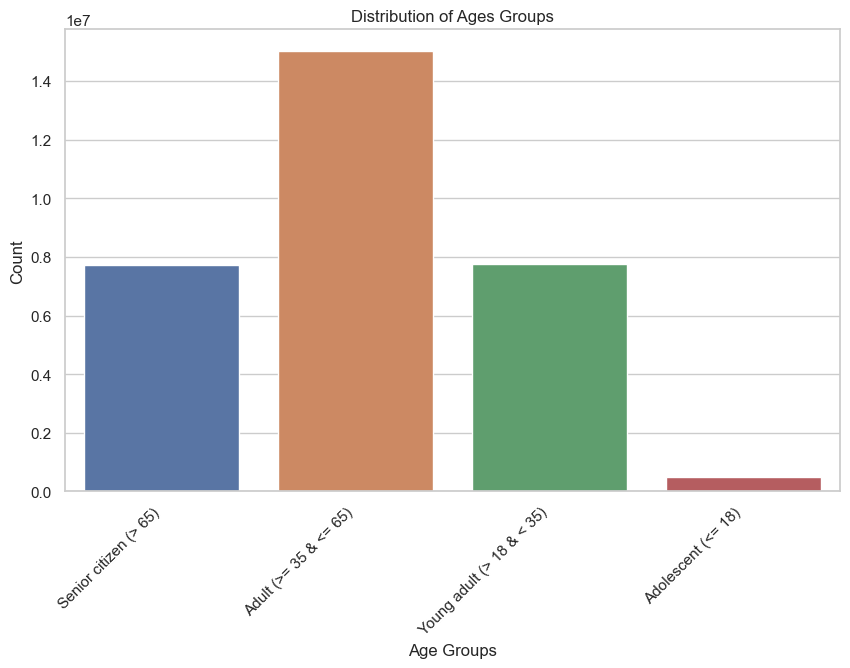

In [189]:
# Display the counts above in a bar chart
# Bar charts that show income type distributions by region

plt.figure(figsize = (10, 6))
barplot1 = sns.countplot(data = df_2, x = 'age_flag')

plt.title('Distribution of Ages Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [190]:
# Export the bar chart

barplot1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-10-distribution-of-age-groups.png'))

#### Create flag based on income

In [191]:
df_2.loc[df_2['income'] <= 12000, 'income_flag'] = "Poor"

In [192]:
df_2.loc[(df_2['income'] > 12000) & (df_2['income'] <= 20000), 'income_flag'] = "Low earner"

In [193]:
df_2.loc[(df_2['income'] > 20000) & (df_2['income'] <= 30000), 'income_flag'] = "Medium earner"

In [194]:
df_2.loc[(df_2['income'] > 30000) & (df_2['income'] <= 80000), 'income_flag'] = "High earner"

In [195]:
df_2.loc[df_2['income'] > 80000, 'income_flag'] = "Very high earner"

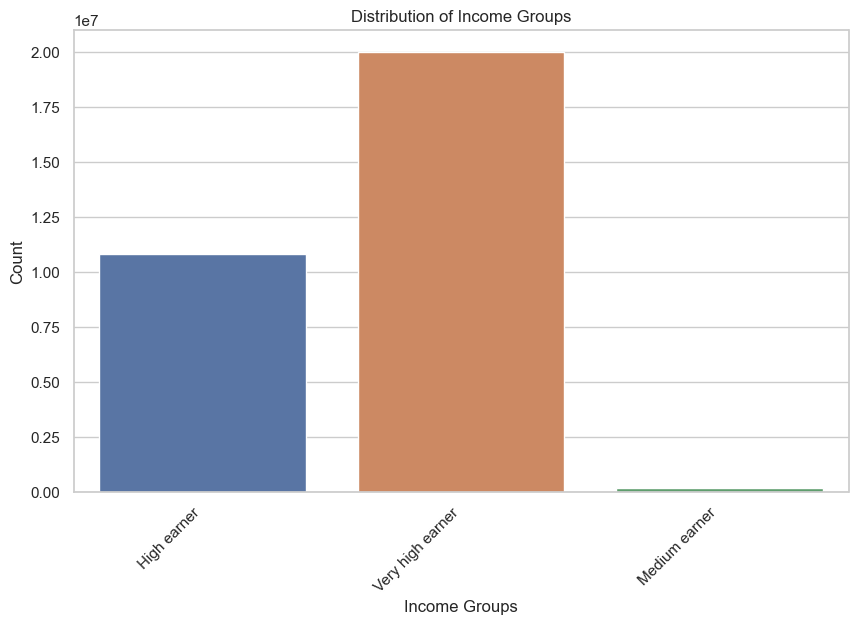

In [196]:
# Display the counts above in a bar chart
# Bar charts that show income type distributions

plt.figure(figsize = (10, 6))
barplot2 = sns.countplot(data = df_2, x = 'income_flag')

plt.title('Distribution of Income Groups')
plt.xlabel('Income Groups')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [197]:
# Export the bar chart

barplot2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-10-distribution-of-age-groups-by-income.png'))

#### Create flag based on dependants

In [198]:
df_2.loc[df_2['dependants'] == 0, 'dependants_flag'] = "No children"

In [199]:
df_2.loc[df_2['dependants'] >= 1, 'dependants_flag'] = "Has children"

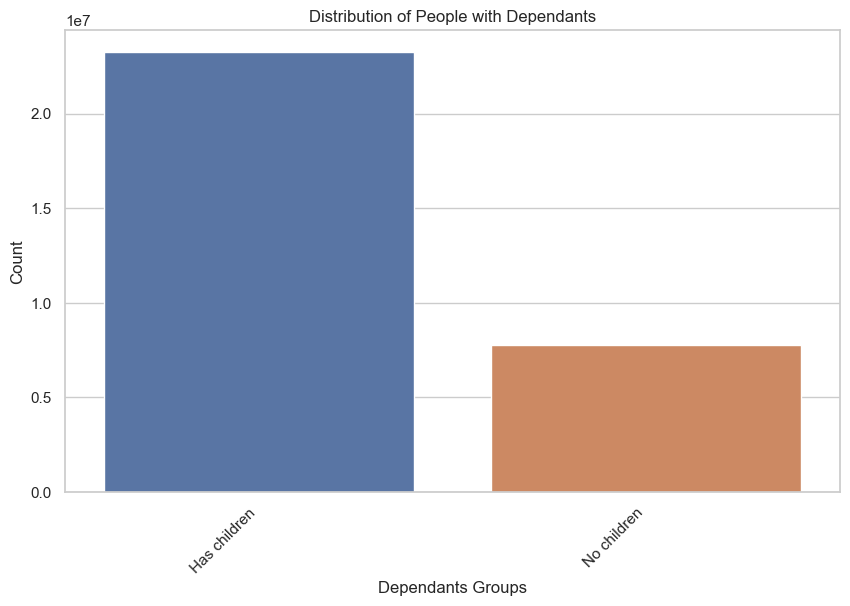

In [200]:
# Display the counts above in a bar chart
# Bar charts that show dependants distributions

plt.figure(figsize = (10, 6))
barplot3 = sns.countplot(data = df_2, x = 'dependants_flag')

plt.title('Distribution of People with Dependants')
plt.xlabel('Dependants Groups')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [201]:
# Export the bar chart

barplot3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-10-distribution-of-people-with-dependants.png'))

### Question 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [213]:
df_2.groupby('income_flag').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                            mean  min   max
income_flag                                
High earner            10.062210  0.0  30.0
Medium earner          10.958442  0.0  30.0
Very high earner        9.890806  0.0  30.0

In [214]:
df_2.groupby('income_flag').agg({'avg_price': ['mean', 'min', 'max']})

avg_price                        
                       mean       min           max
income_flag                                        
High earner        7.522683  1.000000     22.256974
Medium earner      6.536665  1.773333      7.328696
Very high earner  14.372290  6.999655  15006.940000

### Question 8 - Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [215]:
# Import data from departments.csv

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))

In [216]:
df_dep_t = df_dep.T

In [217]:
df_dep_t.reset_index()

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [218]:
# Reset index to remove 'department_id' from row 0

new_header = df_dep_t.iloc[0]

In [219]:
df_dep_t_new = df_dep_t[1:]

In [220]:
df_dep_t_new

,0
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [221]:
# Map department id to department names

department_mapping = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}

# Create a new column "department" based on the mapping

df_2['department'] = df_2['department_id'].map(department_mapping)

In [222]:
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,slowest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spend_type,order_frequency,order_type,gender,state,age,date_joined,dependants,marital_status,income,region,order_flag,age_flag,income_flag,dependants_flag,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,-,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,5 or more,Senior citizen (> 65),High earner,Has children,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,-,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,5 or more,Senior citizen (> 65),High earner,Has children,snacks
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,13,NaN,4,0,both,High-range product,Regularly busy,-,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,5 or more,Senior citizen (> 65),High earner,Has children,meat seafood
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,14,6.0,1,1,both,High-range product,Regularly busy,-,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,5 or more,Senior citizen (> 65),High earner,Has children,meat seafood
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,12,7.0,5,0,both,Mid-range product,Regularly busy,-,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,5 or more,Senior citizen (> 65),High earner,Has children,bulk


In [223]:
# Examine values in 'department' column

df_2['department'].value_counts()

department
produce            9079276
dairy eggs         5191828
snacks             2766406
beverages          2571934
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           678095
meat seafood        674785
personal care       424415
babies              410392
international       255991
alcohol             144674
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

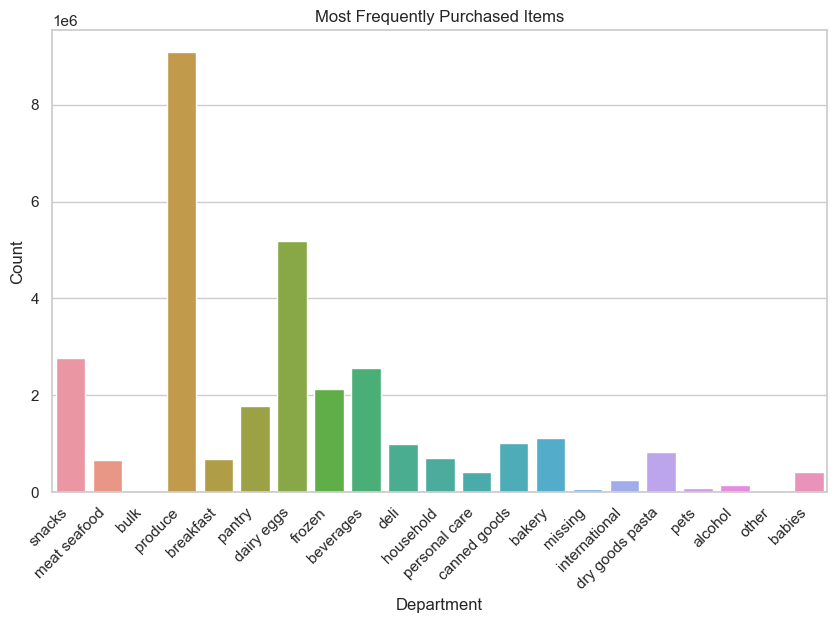

In [224]:
# Display the counts above in a bar chart
# Bar charts that show income type distributions by region

plt.figure(figsize = (10, 6))
barplot4 = sns.countplot(data = df_2, x = 'department')

plt.title('Most Frequently Purchased Items')
plt.xlabel('Department')
plt.ylabel('Count')
# plt.legend(title = 'Order Type Groups', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [225]:
# Export the barplot

barplot4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-10-most-frequently-purchased-items.png'))

#### The most frequently purchased items are: produce, dairy/eggs, beverages and snacks

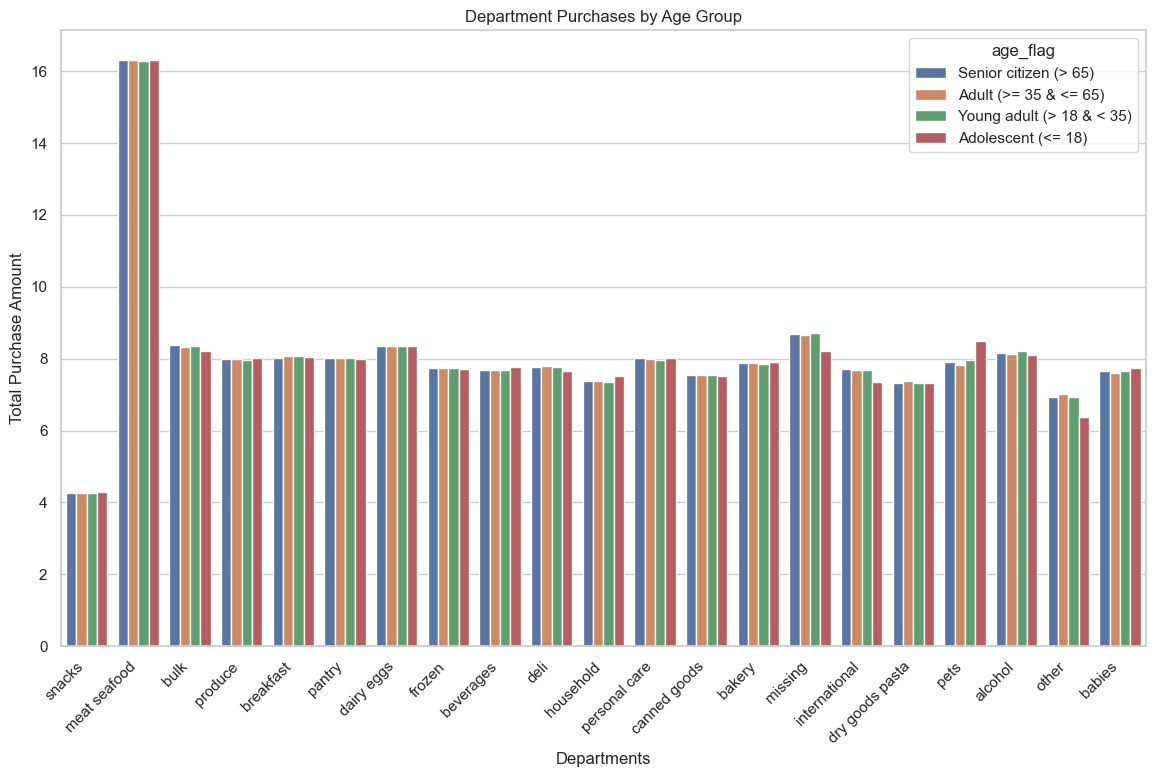

In [226]:
# Display what products people from the various regions purchase.
# Set the style of seaborn
sns.set(style = "whitegrid")

# Create a bar chart
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x = 'department', y = 'prices', hue = 'age_flag', data = df_2, errorbar = None)

# Add labels and title
plt.title('Department Purchases by Age Group')
plt.xlabel('Departments')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation = 45, ha = 'right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [227]:
# It appears that the various age ranges buy about the same amount of each item from specific departments. All age
# groups buy the most items from the 'meat seafood' department.

In [228]:
# Export the bar chart

barplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-10-bar-chart-6.png'))

In [229]:
df_3 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_combined.pkl')) 

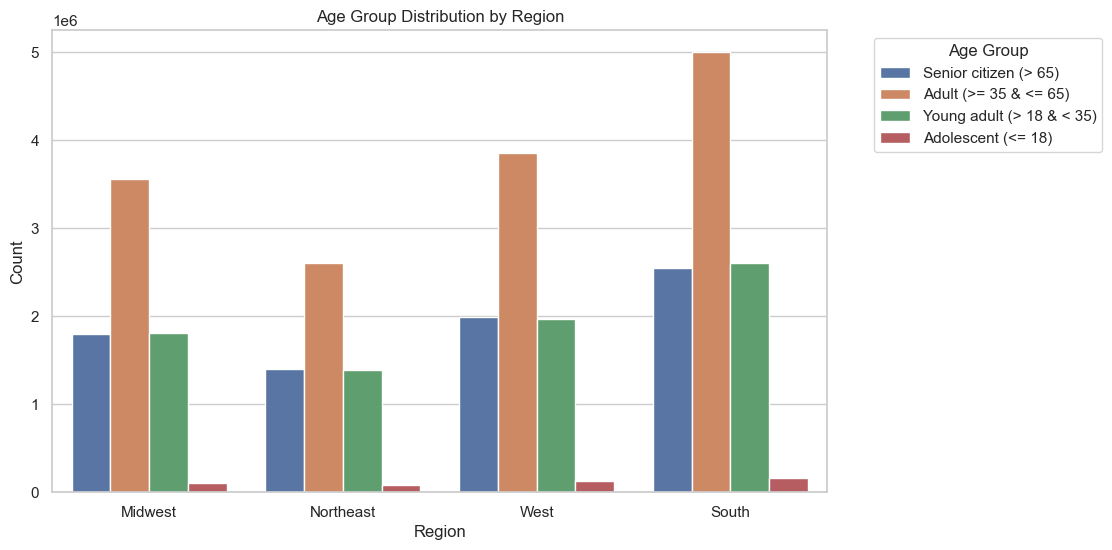

In [230]:
# Bar charts that show age group distributions by region

plt.figure(figsize = (10, 6))
barplot6 = sns.countplot(data = df_2, x = 'region', hue = 'age_flag')

plt.title('Age Group Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [231]:
# Export the bar chart

barplot6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-10-age-group-distribution-by-region.png'))

/Users/davidcarpenter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/davidcarpenter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


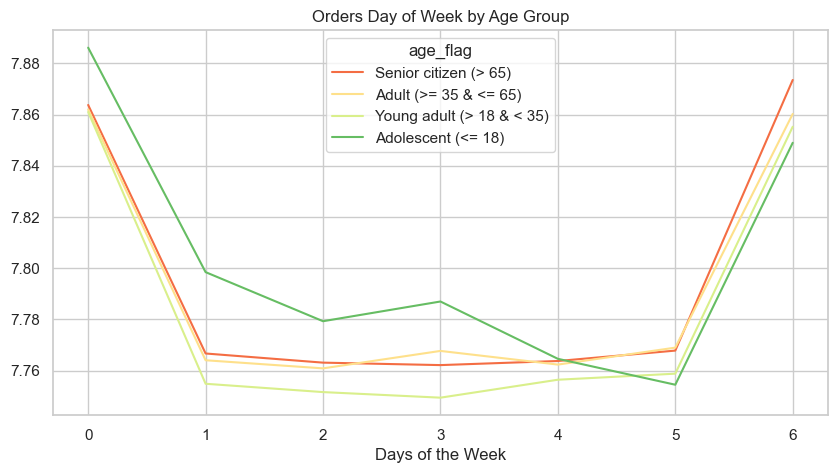

In [232]:
# Line chart for days of the week (order_dow) when a purchase was made and the age of
# the person who made the purchase (age_flag). Day '0' is Saturday.
plt.figure(figsize = (10, 5))

barplot7 = sns.lineplot(data = df_2, 
             x = 'order_dow', 
             y = 'prices', 
             hue = 'age_flag', 
             palette = 'RdYlGn',
             errorbar = None
            )

plt.title("Orders Day of Week by Age Group")
plt.xlabel("Days of the Week")
plt.ylabel("")
plt.show()

#### The line chart shows that all age groups primarily spend the most money on Saturdays (day 0) and Sundays (day 6). Also, adolescents (people 18 years old and younger) spend the most for their purchases compared to the other oage groups.

In [233]:
# Export the line graph

barplot7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-10-orders-day-of-week-by-age-group.png'))

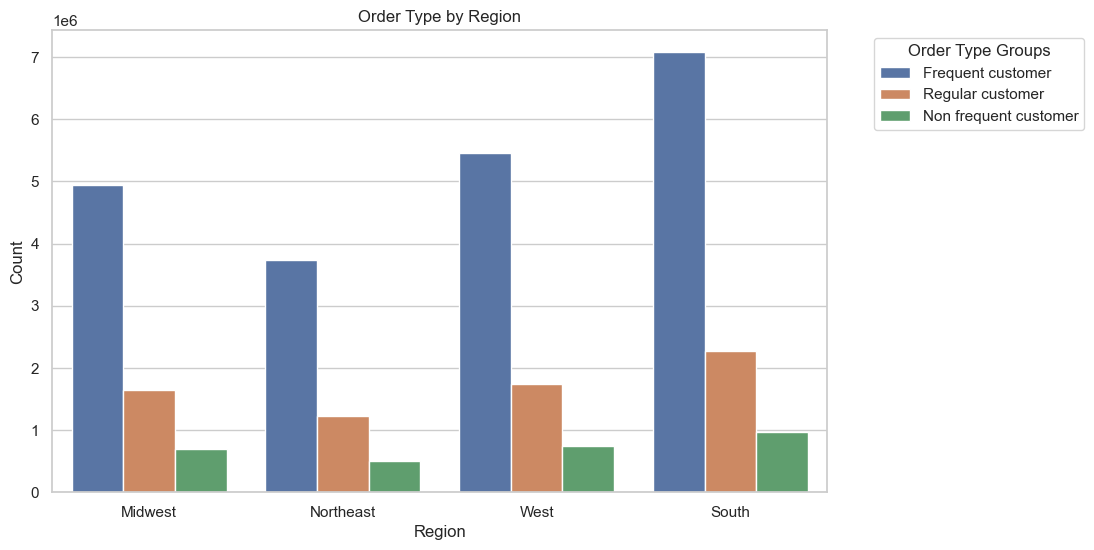

In [234]:
# Bar charts that show age group distributions by region

plt.figure(figsize = (10, 6))
barplot8 = sns.countplot(data = df_2, x = 'region', hue = 'order_type')

plt.title('Order Type by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title = 'Order Type Groups', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

#### The bar charts shows the buying behavior of customers in all regions.

In [235]:
# Export the bar plot

barplot8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-10-order-type-by-region.png'))

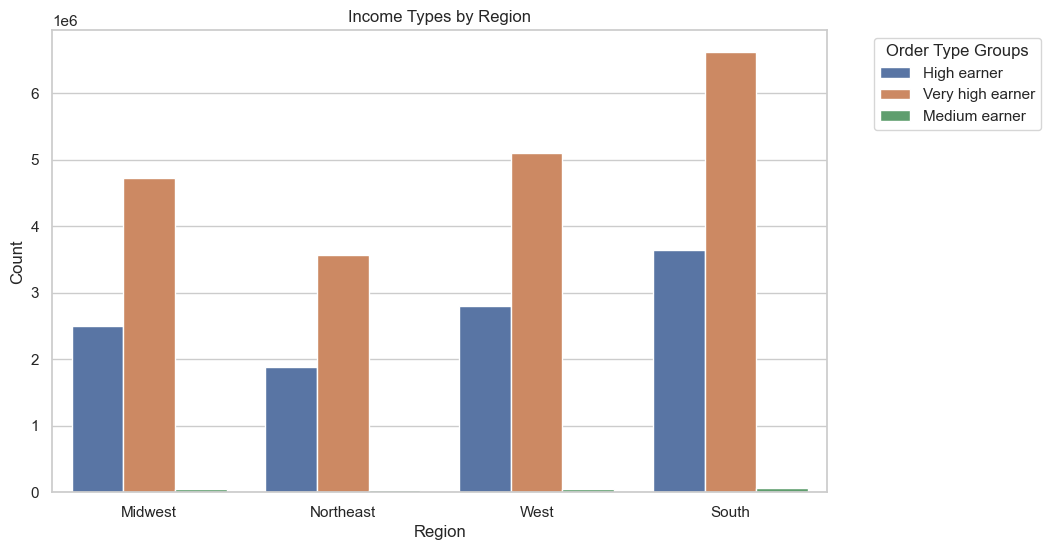

In [236]:
# Bar charts that show income type distributions by region

plt.figure(figsize = (10, 6))
barplot9 = sns.countplot(data = df_2, x = 'region', hue = 'income_flag')

plt.title('Income Types by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title = 'Order Type Groups', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

In [237]:
# Less than 12,000: Poor
# 12,000 to 20,000: Low earner
# 20,000 to 30,000: Medium earner
# 30,000 to 80,000: High earner
# 80,000+: Very high earner

In [238]:
# Export the bar plot

barplot9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-10-income-types-by-region.png'))

#### Very high earners make up the majority of all customers in all regions.

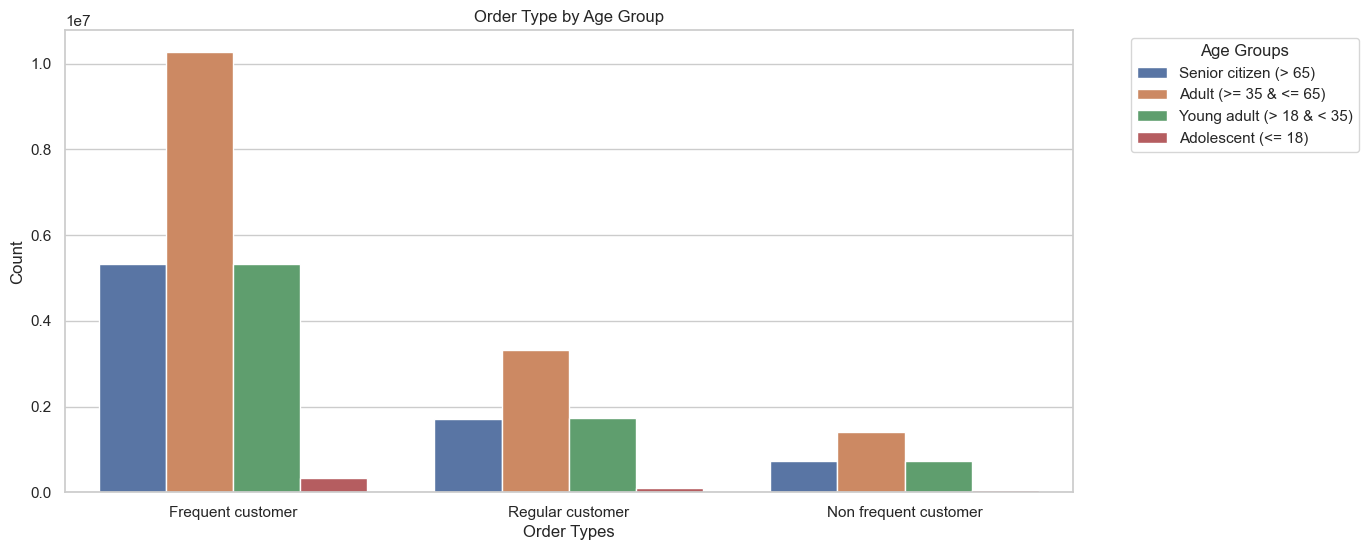

In [239]:
# Bar chart that show age group distributions by region

plt.figure(figsize = (13, 6))
barplot10 = sns.countplot(data = df_2, x = 'order_type', hue = 'age_flag')

plt.title('Order Type by Age Group')
plt.xlabel('Order Types')
plt.ylabel('Count')
plt.legend(title = 'Age Groups', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

#### Adults make up the majority of all order type groups.

In [240]:
# Export the bar plot

barplot10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-10-order-type-by-age-group.png'))